Dimension reduction and state space forecasting, script 2 of the whole program, Chi Zhang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [2]:
LIBOR_zero = pd.read_excel(r'Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='zero')
LIBOR_zero

,3,6,9,12,15,18,21,24,27,30,...,333,336,339,342,345,348,351,354,357,360
2018-11-02,2.61972,2.619717,2.774752,2.854803,2.932020,2.993549,3.041323,3.071053,3.087379,3.101980,...,3.325801,3.324922,3.323999,3.323051,3.322096,3.321101,3.320063,3.318991,3.317906,3.316760
2018-11-09,2.64565,2.645652,2.787011,2.867154,2.943816,3.005727,3.053632,3.080879,3.094139,3.106960,...,3.274852,3.273796,3.272711,3.271608,3.270523,3.269381,3.268219,3.267033,3.265851,3.264617
2018-11-16,2.67221,2.672210,2.769769,2.826092,2.880055,2.923548,2.956085,2.967827,2.968256,2.971993,...,3.198483,3.197749,3.196980,3.196180,3.195376,3.194512,3.193610,3.192671,3.191713,3.190692
2018-11-23,2.71923,2.719228,2.806461,2.847600,2.890131,2.926382,2.953094,2.966664,2.972859,2.978062,...,3.182218,3.181558,3.180872,3.180150,3.179415,3.178641,3.177825,3.176974,3.176107,3.175183
2018-11-30,2.76469,2.764687,2.833875,2.863447,2.895275,2.924858,2.945426,2.945855,2.939158,2.936833,...,3.126252,3.125658,3.125033,3.124374,3.123658,3.122894,3.122091,3.121237,3.120320,3.119348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,0.23667,0.236672,0.239540,0.225065,0.217731,0.213807,0.214528,0.217002,0.221080,0.225428,...,1.144198,1.145238,1.146219,1.147112,1.147898,1.148599,1.149209,1.149715,1.150107,1.150396
2020-10-09,0.22718,0.227178,0.233349,0.224311,0.219946,0.219248,0.223241,0.230714,0.240486,0.249191,...,1.247444,1.248605,1.249700,1.250711,1.251614,1.252437,1.253175,1.253813,1.254338,1.254765
2020-10-16,0.22135,0.221351,0.230009,0.219294,0.212997,0.211585,0.216810,0.223916,0.231390,0.239202,...,1.197151,1.198118,1.199020,1.199843,1.200570,1.201222,1.201795,1.202276,1.202657,1.202949
2020-10-23,0.21945,0.219446,0.233067,0.224358,0.218921,0.217158,0.222589,0.230759,0.238936,0.247750,...,1.320828,1.321901,1.322903,1.323819,1.324628,1.325354,1.325992,1.326530,1.326956,1.327283


In [3]:
LIBOR_fwd = pd.read_excel(r'Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='forward')

In [4]:
SOFR_zero = pd.read_excel(r'Data\SOFR_clean.xlsx', index_col = 0, sheet_name='zero')
#SOFR_zero

In [5]:
SOFR_fwd = pd.read_excel(r'Data\SOFR_clean.xlsx', index_col = 0, sheet_name='forward')

In [6]:
Treasury_zero = pd.read_excel(r'Data\Treasury_clean.xlsx', index_col = 0, sheet_name='zero')
#Treasury_zero

In [7]:
Treasury_fwd = pd.read_excel(r'Data\Treasury_clean.xlsx', index_col = 0, sheet_name='forward')

In [8]:
OIS_zero = pd.read_excel(r'Data\OIS_clean.xlsx', index_col = 0, sheet_name='zero')

In [9]:
OIS_fwd = pd.read_excel(r'Data\OIS_clean.xlsx', index_col = 0, sheet_name='forward')

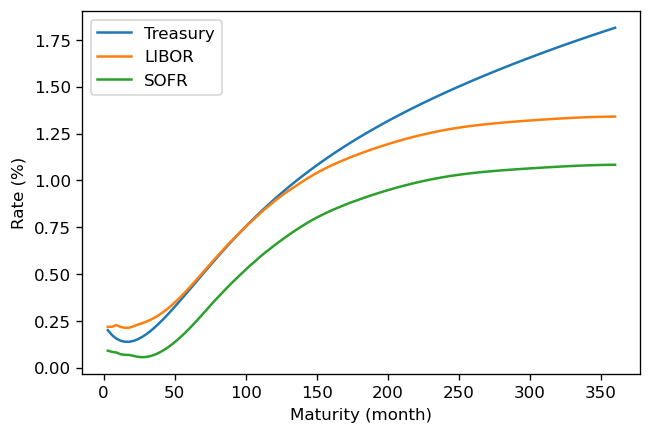

In [13]:
plt.figure(dpi=120)
l1, = plt.plot(Treasury_zero.columns, Treasury_zero.loc['2020-10-30'])
l2, = plt.plot(LIBOR_zero.columns, LIBOR_zero.loc['2020-10-30'])
l3, = plt.plot(SOFR_zero.columns, SOFR_zero.loc['2020-10-30'])
#plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.xlabel("Maturity (month)")
plt.ylabel("Rate (%)")
plt.legend(handles=[l1,l2,l3], labels = ['Treasury','LIBOR','SOFR'], loc='best')

## Detect outliers

In [14]:
median = LIBOR_zero.median()
sig_robus = LIBOR_zero.mad() * 1.4826
LIBOR_zero[np.abs(LIBOR_zero-median) > 2* sig_robus].any(axis=1).sum()

0

In [15]:
median = SOFR_zero.median()
sig_robus = SOFR_zero.mad() * 1.4826
SOFR_zero[np.abs(SOFR_zero-median) > 2* sig_robus].any(axis=1).sum()

0

In [16]:
median = Treasury_zero.median()
sig_robus = Treasury_zero.mad() * 1.4826
Treasury_zero[np.abs(Treasury_zero-median) > 2* sig_robus].any(axis=1).sum()

0

## Spread calculation

In [24]:
SwapSpd_zero = LIBOR_zero - Treasury_zero
BasisSpd_zero = LIBOR_zero - SOFR_zero

Text(0, 0.5, 'Rate (%)')

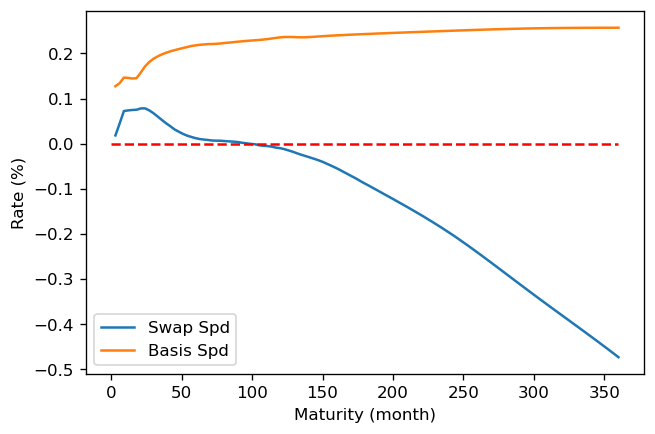

In [25]:
plt.figure(10,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2020-10-30'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2020-10-30'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')
plt.xlabel("Maturity (month)")
plt.ylabel("Rate (%)")

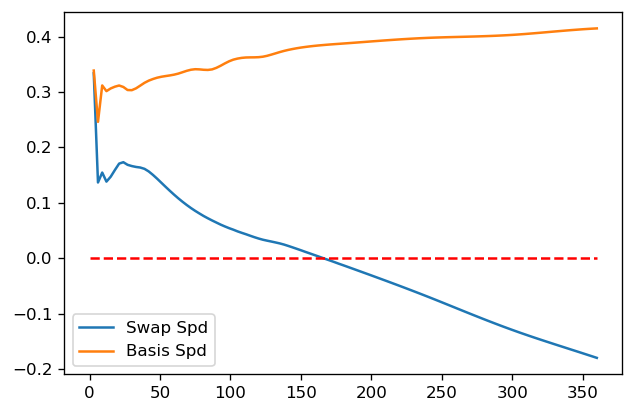

In [26]:
plt.figure(11,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2018-11-02'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2018-11-02'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

Text(0, 0.5, 'Rate (%)')

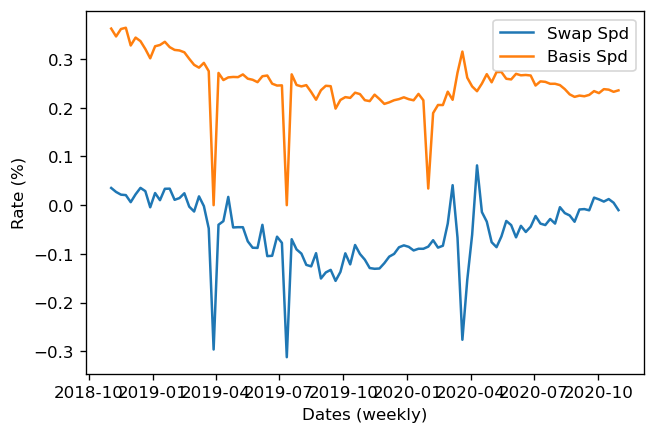

In [27]:
plt.figure(dpi=120)
l1, = plt.plot(SwapSpd_zero.index, SwapSpd_zero[120])
l2, = plt.plot(BasisSpd_zero.index, BasisSpd_zero[120])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')
plt.xlabel("Dates (weekly)")
plt.ylabel("Rate (%)")

To start with, we build four toy dimension-reduction functions to have a glimpse of various patterns of 2d/3d low-dimensional representations.

## DmnsRdct1: PCA

In [28]:
def DmnsRdct1(curve_data):
    # the input could be any term structure of interest, num of samples by num of tenors
    scaler = StandardScaler()
    scaler.fit(curve_data)
    curve_data_scaled = scaler.transform(curve_data)
    
    model1 = PCA(n_components=3, copy=True, whiten=False)
    model1.fit(curve_data_scaled)
    curve_data_low = pd.DataFrame(model1.transform(curve_data_scaled))
    curve_data_low.index = curve_data.index
    
    for i, pc in enumerate(model1.explained_variance_ratio_):
        print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))
        
    fig = plt.figure(figsize=(8,6))
    plt.title('First {0} PCA components'.format(np.shape(np.transpose(model1.components_))[1]))
    l1, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,0])
    l2, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,1])
    l3, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,2])
    plt.legend(handles=[l1,l2,l3], labels = ['1 pc','2 pc','3 pc'], loc='best')
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,1+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,0],curve_data_low.loc[:,1], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,0],curve_data_low.loc[:,2], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(1+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(curve_data_low.loc[:,1],curve_data_low.loc[:,2], c=[d.year + d.month/12 for d in curve_data_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    return curve_data_low

1.	99.32%
2.	0.51%
3.	0.14%


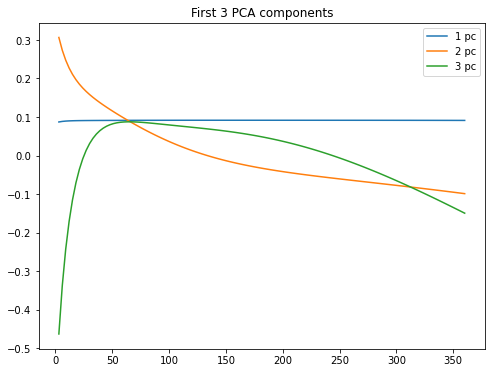

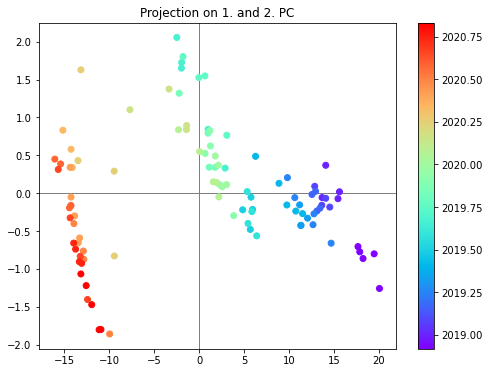

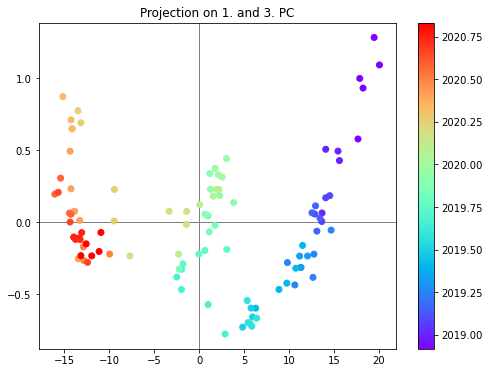

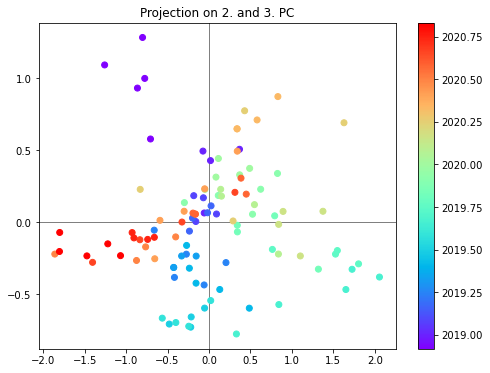

In [18]:
Treasury_zero_low = DmnsRdct1(Treasury_zero)
# show proportion of explained variance by leading PCs and loadings

The first two graphs with 1st pc is more informative: in recent dates (late 2020), the level is lower than then the early period (late 2018).
For the second pc (whose loading is downward sloping), a positive value (late 2019 and early 2020) means the original curve is downward sloping at that time.On the other hand, a negative value (late 2020) and (early 2019) indicates the curve is upward sloping then.

1.	99.10%
2.	0.76%
3.	0.12%


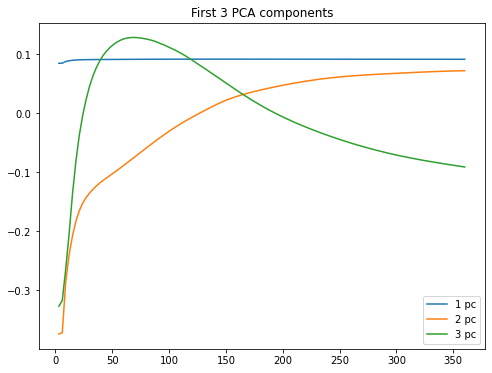

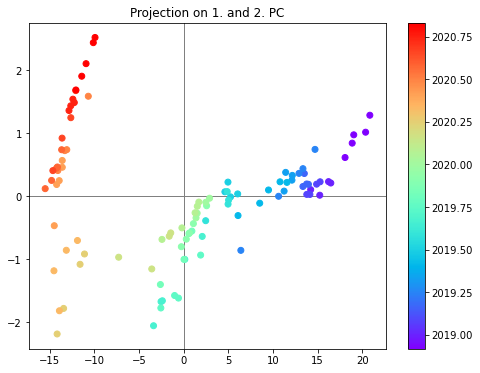

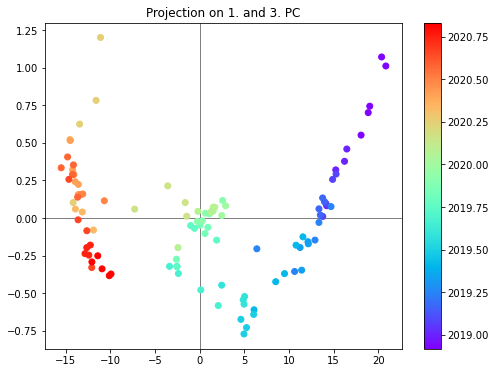

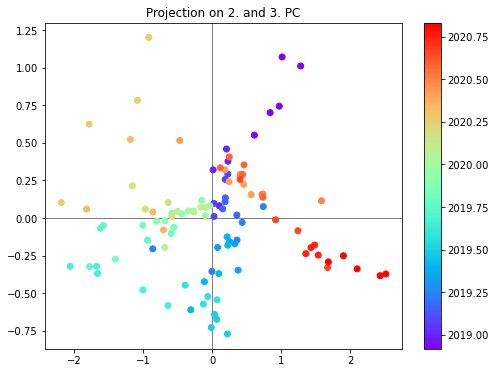

In [21]:
LIBOR_zero_low = DmnsRdct1(LIBOR_zero)
# same procedure for the LIBOR zero curve

For the second pc of LIBOR (whose loading is upward sloping), a negative value (late 2019 and early 2020) means the original curve is downward sloping at that time.On the other hand, a positive value (late 2020) and (early 2019) indicates the curve is upward sloping then.

1.	99.20%
2.	0.56%
3.	0.20%


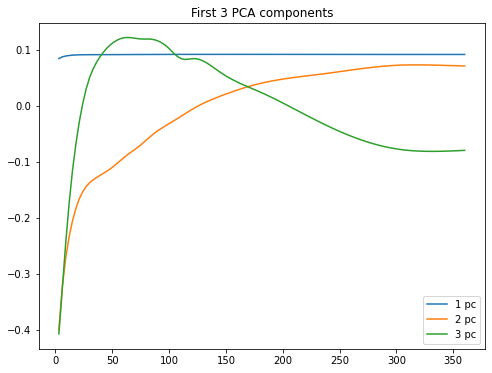

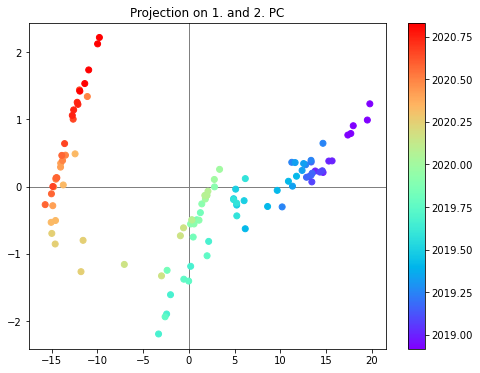

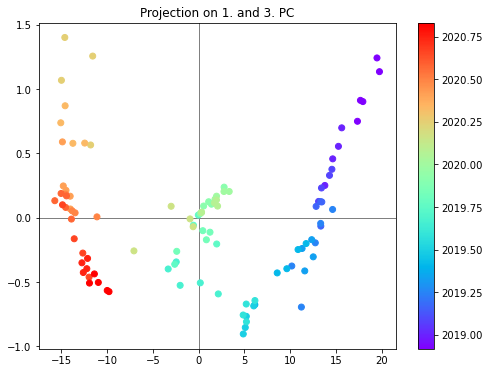

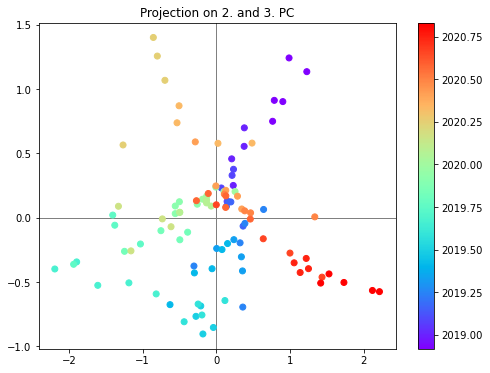

In [22]:
SOFR_zero_low = DmnsRdct1(SOFR_zero)
# same procedure for the SOFR zero curve

1.	79.55%
2.	13.18%
3.	5.34%


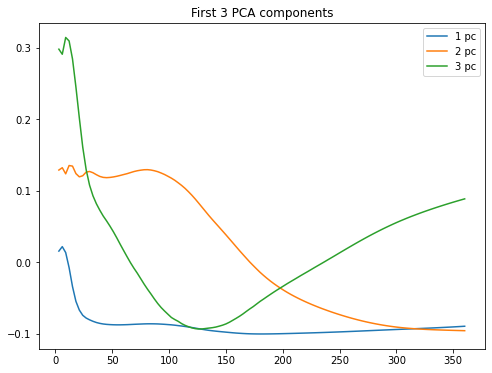

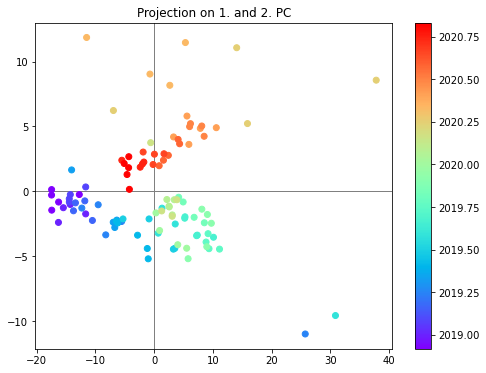

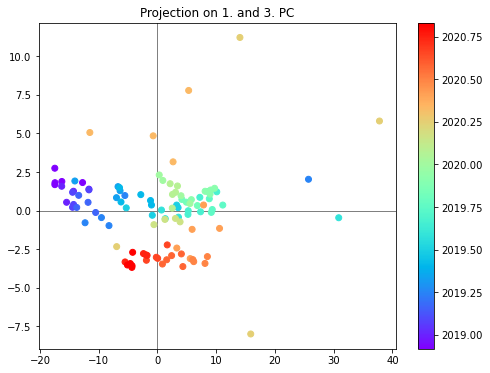

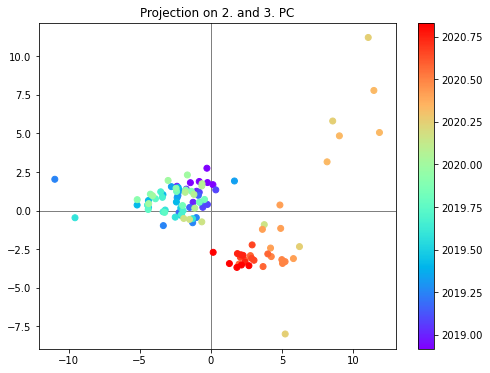

In [23]:
SwapSpd_zero_low = DmnsRdct1(SwapSpd_zero)

As shown in the previous 2 figures, the 1pc is centered around zero value. The data cluster performance is frustrating in terms of inter-cluster distance. Hence, we will compare the two methodologies for modeling spread curves: (1) start from modeling the term structure of each interest rate, then calculate the spread after the time series forcast step; (2) directly model the spread curves and do time series forecasting.

1.	87.94%
2.	7.95%
3.	1.81%


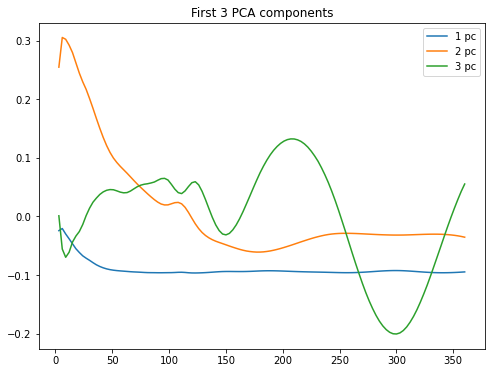

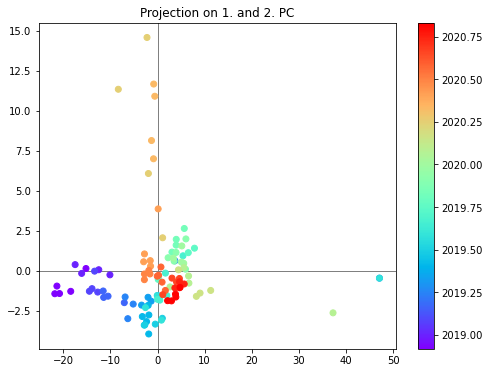

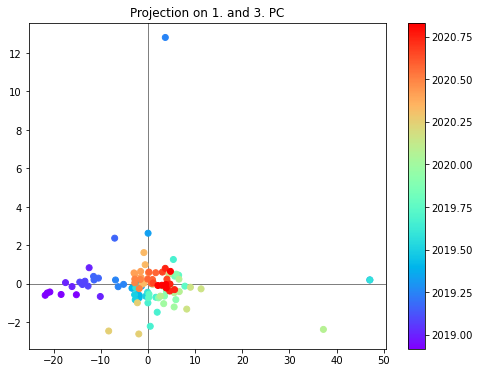

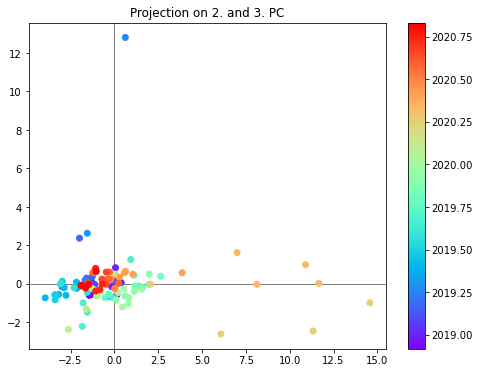

In [24]:
BasisSpd_zero_low = DmnsRdct1(BasisSpd_zero)

## DmnsRdct2: MDS

In [18]:
scaler = StandardScaler()
scaler.fit(Treasury_zero)
Treasury_zero_scaled = scaler.transform(Treasury_zero)

In [19]:
model2 = MDS(n_components=3, dissimilarity='euclidean')
Treasury_zero_low = pd.DataFrame(model2.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

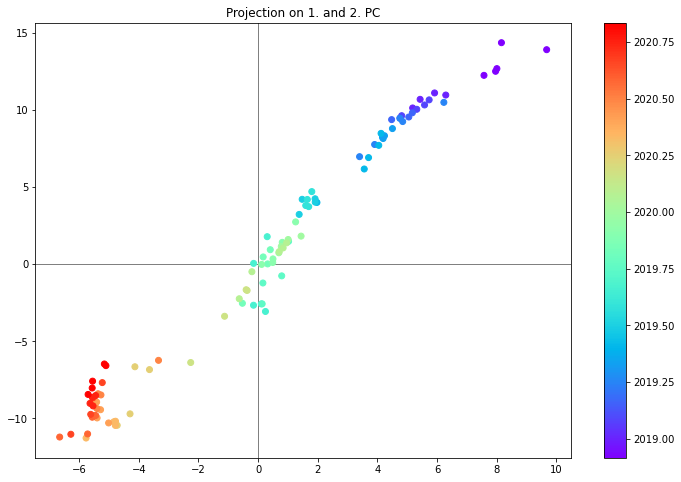

In [24]:
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

As shown in the fig above, the first two PC from MDS are linear correlated. The temporal evolution is pretty observable.

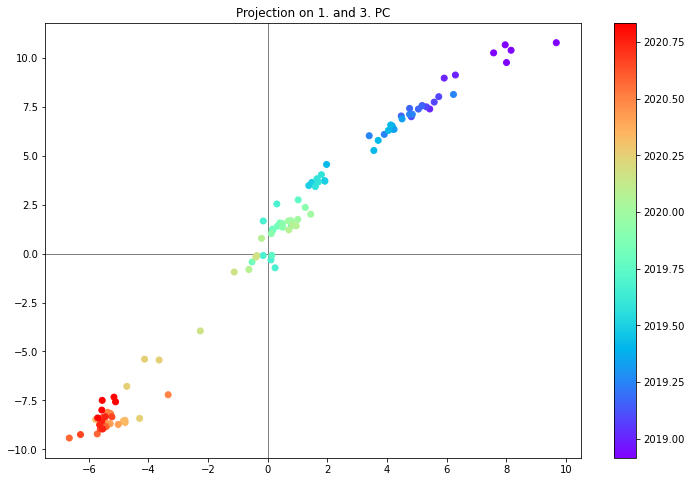

In [25]:
pc1 = 0
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

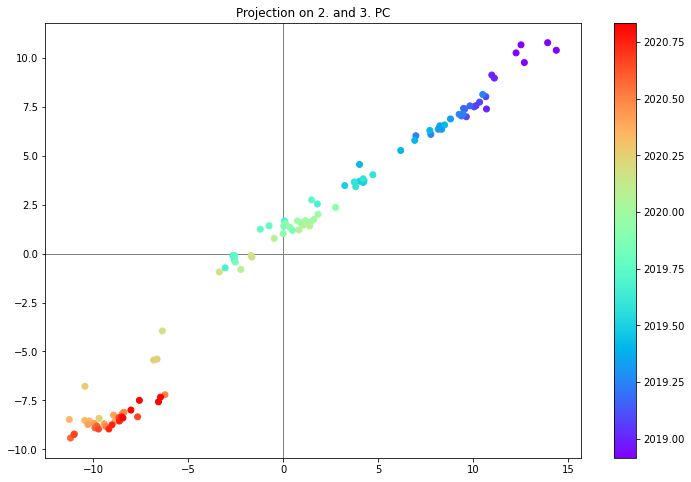

In [26]:
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

## DmnsRdct3: LLE

In [28]:
model3 = LocallyLinearEmbedding(n_components=3, n_neighbors = 10)
Treasury_zero_low = pd.DataFrame(model3.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

In [29]:
Treasury_zero_low

,0,1,2
2018-11-02,-0.104423,-0.232054,0.024762
2018-11-09,-0.102918,-0.222204,0.023628
2018-11-16,-0.099487,-0.199295,0.020161
2018-11-23,-0.098558,-0.193151,0.019340
2018-11-30,-0.097744,-0.187668,0.018422
...,...,...,...
2020-10-02,0.128130,-0.008466,0.150052
2020-10-09,0.107308,0.016492,0.223350
2020-10-16,0.118510,0.002919,0.172629
2020-10-23,0.093097,0.033610,0.279889


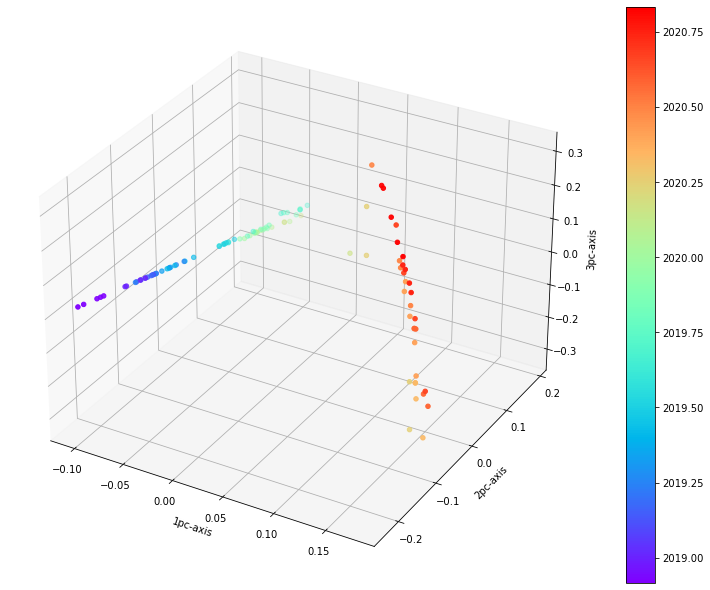

In [30]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

sc = ax.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
ax.set_xlabel('1pc-axis')
ax.set_ylabel('2pc-axis')
ax.set_zlabel('3pc-axis')
cb = plt.colorbar(sc)

## DmnsRdct4: t-SNE

In [41]:
model4 = TSNE(n_components=3, init = 'pca', perplexity=15)
Treasury_zero_low = pd.DataFrame(model4.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

In [42]:
Treasury_zero_low

,0,1,2
2018-11-02,86.185661,66.782928,53.942513
2018-11-09,81.128120,88.170303,6.574101
2018-11-16,99.769188,84.507675,31.981743
2018-11-23,66.016151,67.926323,26.660673
2018-11-30,94.396416,57.221897,15.317951
...,...,...,...
2020-10-02,-96.325043,2.292442,91.538826
2020-10-09,-70.632698,38.727669,52.732418
2020-10-16,-90.913696,39.205994,83.532585
2020-10-23,-43.476467,50.678257,69.544411


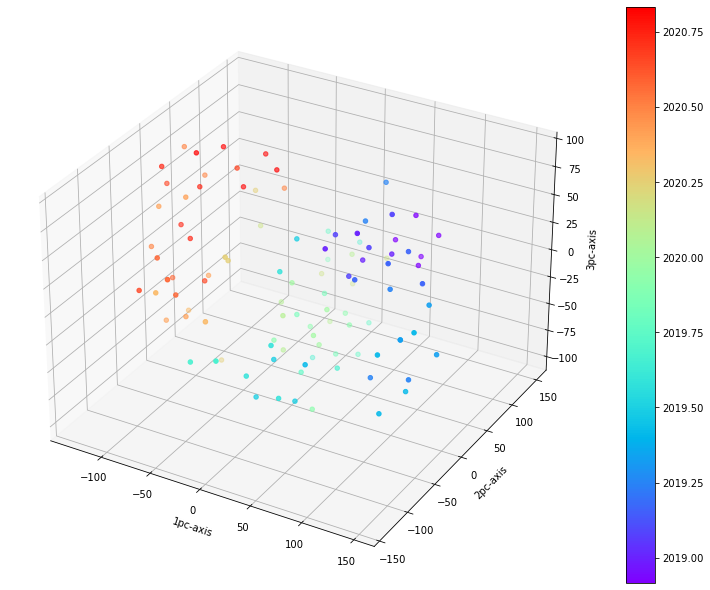

In [43]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

sc = ax.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
ax.set_xlabel('1pc-axis')
ax.set_ylabel('2pc-axis')
ax.set_zlabel('3pc-axis')
cb = plt.colorbar(sc)

## Time Series Forecasting in low-D

To refresh the idea of Kalman Filter: it assumes a linear dynamics for the true state $\mathbf x_k$ with $k \in \mathbb{N}$, and Normally distributed errors.    

$$
\begin{aligned}
\mathbf x_{k} &= \mathbf F_k \mathbf x_{k-1} + \mathbf w_k & \mbox{with}  \quad \mathbf w_k \sim \mathcal{N}(0, \mathbf Q_k)  \\
\mathbf z_k &=  \mathbf H_k \mathbf x_{k} + \mathbf v_k  & \mbox{with}  \quad \mathbf v_k \sim \mathcal{N}(0, \mathbf R_k)  \\
\\\end{aligned}
$$

The first equation is the **process equation** for the true state,
where $\mathbf F_k$ is the *state transition function* (or matrix), and $\mathbf w_k$ is the process noise with covariance $\mathbf Q_k$.     
The second equation is the **measurement equation**, where $\mathbf z_k$ are the measurement of the true state $\mathbf x_k$. The term $\mathbf H_k$ is the *measurement function* (or matrix), and $\mathbf v_k$ is the measurement noise with covariance $\mathbf R_k$. 

The Kalman filter equations, taken from [here](https://en.wikipedia.org/wiki/Kalman_filter#Underlying_dynamical_system_model), are:

$$
\begin{aligned}
\text{Predict Step}\\
\hat{\mathbf x}_{k\mid k-1} &= \mathbf F_k\hat{\mathbf x}_{k-1\mid k-1}  \hspace{10em} \mbox{(a priori) state mean prediction} \\
\mathbf P_{k\mid k-1} &=  \mathbf F_k \mathbf P_{k-1\mid k-1} \mathbf F_k^\mathsf T + \mathbf Q_k \hspace{6.5em} \mbox{(a priori) state covariance prediction} \\        	
\\
\text{Helper variables}\\
\tilde{\mathbf y}_k &= \mathbf z_k - \mathbf H_k\hat{\mathbf x}_{k\mid k-1} \hspace{9.3em} \mbox{pre-fit residuals}\\
\mathbf{S}_k &= \mathbf H_k \mathbf P_{k\mid k-1} \mathbf H_k^\mathsf T + \mathbf R_k \hspace{8em} \mbox{pre-fit measurement covariance} \\
\mathbf K_k &= \mathbf P_{k\mid k-1}\mathbf H_k^\mathsf T \mathbf{S}_k^{-1} \hspace{10em} \mbox{Kalman Gain}\\
\\
\text{Update Step}\\
\hat{\mathbf x}_{k\mid k} &= \hat{\mathbf x}_{k\mid k-1} + \mathbf K_k\tilde{\mathbf y}_k \hspace{9.4em} \mbox{(a posteriori) state estimate}\\
\mathbf P_{k|k} &= (\mathbb{1} - \mathbf K_k \mathbf H_k) \mathbf P_{k|k-1} \hspace{8em} \mbox{(a posteriori) covariance estimate} \\
\\
\tilde{\mathbf y}_{k\mid k} &= \mathbf z_k - \mathbf H_k\hat{\mathbf x}_{k\mid k} \hspace{10em} \mbox{post-fit residuals}\\
\\\end{aligned}
$$

The notation $\hat {\mathbf {x} }_{k\mid k-1}$ represents the (a priori) estimate of $\mathbf {x}$ at time $k$ given an observation (a measurement) at time $k-1$. Instead, $\hat {\mathbf {x} }_{k\mid k}$ represents the (a posteriori) estimate of $\mathbf {x}$ at time $k$ given an observation at time $k$.

##### Comments:
- Residuals are computed in the measurement space.     
The variable $\mathbf x$ needs to be transformed by $\mathbf H$ before the subtraction with $\mathbf z$.
- The (a priori) covariance is simply the conditional covariance of the process dynamics:

$$\begin{aligned}
\mathbf P_{k\mid k-1} = \text{Cov}[\mathbf x_k \mid \mathbf x_{k-1}] &= \text{Cov}[ \mathbf F_k \mathbf x_{k-1} \mid \mathbf x_{k-1}] + \text{Cov}[\mathbf w_k \mid \mathbf x_{k-1}] \\
                     &= \mathbf F_k \, \text{Cov}[\mathbf x_{k-1} \mid \mathbf x_{k-1}]\, \mathbf F_k^T + \mathbf Q_k \\
                     &= \mathbf F_k \, \mathbf P_{k-1\mid k-1}\, \mathbf F_k^T + \mathbf Q_k 
\end{aligned}$$
- The term $\mathbf{S}_k$ is the conditional covariance of the measurement.  

$$\begin{aligned}
\mathbf S_{k} = \text{Cov}[\mathbf z_k \mid \mathbf x_{k-1}] &= \text{Cov}[ \mathbf H_k \mathbf x_{k} \mid \mathbf x_{k-1}] + \text{Cov}[\mathbf v_k \mid \mathbf x_{k-1}] \\
                     &= \mathbf H_k \, \text{Cov}[\mathbf x_{k} \mid \mathbf x_{k-1}]\, \mathbf H_k^T + \mathbf R_k 
\end{aligned}$$
- Of course $\mathbf w_{k}$ and $\mathbf v_{k}$ are independent of $\mathbf x_{k-1}$.

##### Marginal probability distribution

Let us recall the [marginal distribution](https://en.wikipedia.org/wiki/Kalman_filter#Marginal_likelihood), where the hidden state variables $\mathbf x_k$ are integrated out.    
If we define $\mathbf z = (\mathbf z_0, \mathbf z_1, ... )$, we have:

$$ \mathbb{P}(\mathbf z) = \prod_{k} \mathcal{N} \bigg( \mathbf z_k; \; \mathbf H_k \mathbf x_{k \mid k-1}, \mathbf S_k \bigg) $$

where $\mathbf H_k \mathbf x_{k \mid k-1}$ and $\mathbf S_k$ are the mean and covariance of normal distribution of $\mathbf z_k$.

In [31]:
import statsmodels.tsa.arima_model as sml
import statsmodels.tsa.statespace.sarimax as smss
import statsmodels.stats.diagnostic as smd
import Kalman_filter as KF

In [32]:
import warnings
warnings.filterwarnings('ignore')

### Randomness test and ARMA Fitting - Treasury Zero - PCA

entire dataset  
Using the Treasury zero curve, we test the the simple AR(1) model could capture the dynamics of the low-dim representations of the PCA outputs. If the results seems promising, we will use the estimated beta as our initial values for the following Kalman regression.

The AR(1) is the Auto-Regressive process of order 1 [wiki](https://en.wikipedia.org/wiki/Autoregressive_model#Example:_An_AR(1)_process).

$$ (X_t - \mu) = \phi (X_{t-1} - \mu) + \epsilon_t $$

where $\mu$ is the mean of $X_t$, and $t \in \mathbb{N}$. We also assume uncorrelated errors $\epsilon_t \sim \mathcal{N}(0,\sigma^2)$.

The process can be written in the form of a linear regression, where the value of $X_t$ is modelled as a linear function of $X_{t-1}$:

$$ X_t = \alpha + \beta X_{t-1} + \epsilon_t $$

with $\beta = \phi$ and $\alpha = \mu (1-\phi)$.      

Ljung-Box test  
$ H_0 $: no auto-correlation between the series up to the given lag number

5     0.000000
11    0.000000
22    0.000000
Name: lb_pvalue, dtype: object
5     0.270514
11    0.810657
22    0.740796
Name: lb_pvalue, dtype: object 

mu = -13.5582
beta = 0.9782
alpha = -0.2956


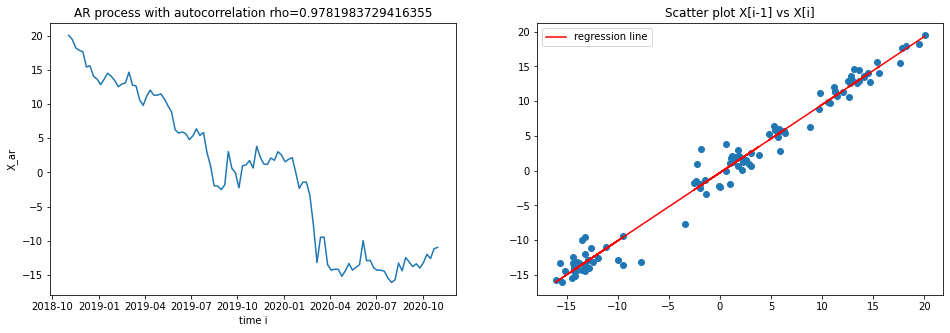

5     0.000000
11    0.000000
22    0.000000
Name: lb_pvalue, dtype: object
5     0.756987
11    0.990147
22    0.885130
Name: lb_pvalue, dtype: object 

mu = -0.0124
beta = 0.8246
alpha = -0.0022


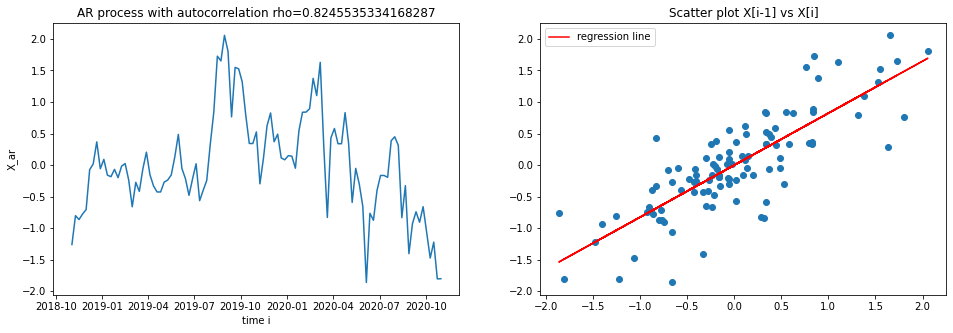

5     0.000000
11    0.000000
22    0.000000
Name: lb_pvalue, dtype: object
5     0.001249
11    0.003017
22    0.007086
Name: lb_pvalue, dtype: object 

mu = -0.0737
beta = 0.8496
alpha = -0.0111


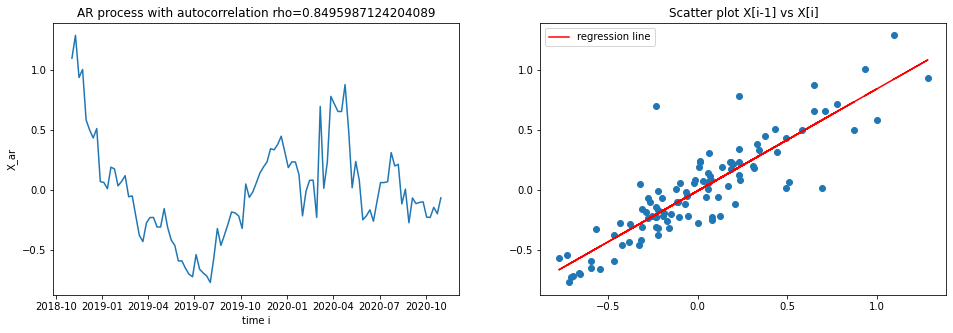

In [60]:
for col in Treasury_zero_low.columns:
    # apply Ljung-Box test before ARMA fitting
    LB_res = smd.acorr_ljungbox(Treasury_zero_low[col], lags=[5, 11, 22], return_df=True)
    print(LB_res['lb_pvalue'].map('{:,.6f}'.format))
    # ARMA fitting
    AR1 = sml.ARMA( Treasury_zero_low[col], (1,0) ).fit(disp=0, method='css')
    # apply Ljung-Box test after ARMA fitting
    LB_res_post = smd.acorr_ljungbox(AR1.resid, lags=[5, 11, 22], model_df = 1+0, return_df=True)
    print(LB_res_post['lb_pvalue'].map('{:,.6f}'.format),'\n')
    
    print("mu = %.4f" % AR1.params[0])
    print("beta = %.4f" % AR1.params[1])
    alpha = AR1.params[0] * (1-AR1.params[1])
    print("alpha = %.4f" % float(alpha))
    
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

    ax1.plot(Treasury_zero_low[col]); ax1.set_xlabel("time i"); ax1.set_ylabel("X_ar")
    ax1.set_title("AR process with autocorrelation rho={}".format(AR1.params[1]))
    ax2.scatter(Treasury_zero_low[col][:-1], Treasury_zero_low[col][1:]); ax2.set_title("Scatter plot X[i-1] vs X[i]") 
    ax2.plot(Treasury_zero_low[col][:-1], alpha + AR1.params[1]*Treasury_zero_low[col][:-1], color="r", label="regression line"); ax2.legend()
    plt.show()

AR(1) could well fit the first two PCA low-dim factors, but fail to capture all the predictive information in the third factor (reject null hypothesis).

Train and Test sets  
Using the train set, apart from the beta and alpha estimates, we also obtain the guess of the variance of measurement noise $\mathbf var_{eps}$ .

In [22]:
training_size = 80
set_var_eps = []

for col in Treasury_zero_low.columns:
    AR1 = sml.ARMA( Treasury_zero_low[col][:training_size], (1,0) ).fit(disp=0, method='css')
    alpha = AR1.params[0] * (1-AR1.params[1])
    resid = AR1.resid
    var_eps_ols = resid.var(ddof=2)    # a possible initial guess for var_eps
    set_var_eps.append(var_eps_ols)
    
    print("var_eps = %.4f" % var_eps_ols)
    print("beta = %.4f" % AR1.params[1])
    print("alpha = %.4f\n" % float(alpha))

var_eps = 2.7018
beta = 0.9877
alpha = -0.3679

var_eps = 0.1760
beta = 0.7705
alpha = 0.0608

var_eps = 0.0426
beta = 0.8612
alpha = -0.0111



In [23]:
set_var_eps

[2.7018011188816233, 0.1760478888624647, 0.04262245281586083]

### Kalman filter

Window-dependent estimation  
In a rolling regression manner, we obtain the guess of the variance of process noise $\mathbf var_{eta}$ .

In [24]:
rolling_window = 60
set_var_eta = []

for col in Treasury_zero_low.columns:
    set_train_beta = []
    
    for i in range( rolling_window, training_size):
        AR1 = sml.ARMA( Treasury_zero_low[col][i-rolling_window:i+1], (1,0) ).fit(disp=0, method='css')
        set_train_beta.append(AR1.params[1])
    
    set_var_eta.append( np.std(np.diff(set_train_beta)) ** 2)

In [25]:
set_var_eta

[0.00010093968935075345, 0.0003439688603344009, 0.000796098383827286]

Kalman filter application

The state variable is $\mathbf Coef_k = \bigg( \begin{array}{c} \alpha_k \\ \beta_k \end{array} \bigg)$.

The model equations are:
##### process equation:
$$
\biggl(\begin{array}{c} \alpha_k\\ \beta_k \end{array}\biggr) = 
\biggl(\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array}\biggr)
\biggl(\begin{array}{c} \alpha_{k-1}\\ \beta_{k-1} \end{array}\biggr) 
+ \biggl(\begin{array}{c} \eta^{\alpha}_k\\ \eta^{\beta}_k \end{array}\biggr) \quad \mbox{with}  \quad 
\biggl(\begin{array}{c} \eta^{\alpha}_k\\ \eta^{\beta}_k \end{array}\biggr) \sim \mathcal{N}(0, \mathbf Q_k) 
\quad \text{and} \quad \mathbf Q_k = \biggl(\begin{array}{cc} \sigma^2_{\alpha} & 0\\ 0 & \sigma^2_{\beta} \end{array}\biggr) $$
##### measurement equation:
$$
y_k =   \bigl(\begin{array}{cc} 1 & x_k \end{array}\bigr) \biggl(\begin{array}{c} \alpha_k\\ \beta_k \end{array}\biggr)
+ \epsilon_k  \quad \mbox{with}  \quad \epsilon_k \sim \mathcal{N}(0, \sigma^2_{\epsilon})  \\
$$

We see that the transition matrix is the identity $\mathbf F_k = \mathbb 1$, and the measurement matrix is $\mathbf H_k = \bigl(\begin{array}{cc} 1 & x_k \end{array}\bigr) $.    
We also assume $\eta^{\alpha}_k$ and $\eta^{\beta}_k$ uncorrelated.

beta_last =  0.9824383814686607 P_last =  0.0015178553219682212


beta_last =  0.7051490740796899 P_last =  0.010308875743207376


beta_last =  0.7660749618376843 P_last =  0.010448854197209477




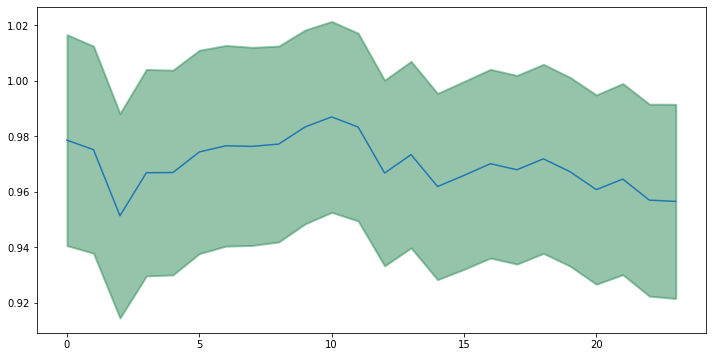

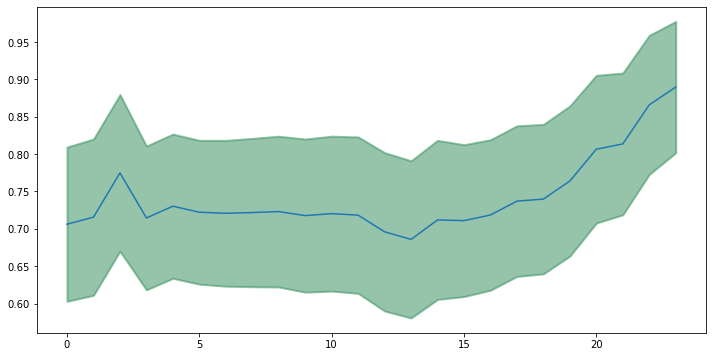

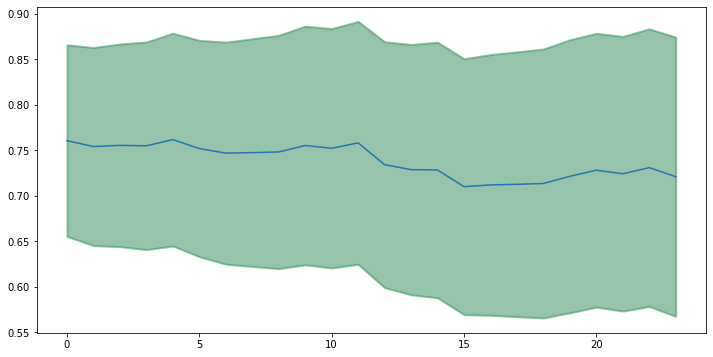

In [26]:
# obtain noise params using OLS
for col in Treasury_zero_low.columns:
    # Training:
    # init a KF instantiate
    KR = KF.Kalman_regression(Treasury_zero_low[col][:training_size-1], Treasury_zero_low[col][1:training_size])
    # set noise params
    KR.var_eps = set_var_eps[col]
    KR.var_eta = set_var_eta[col]
    # run the exact Kalman Algo
    KR.run()
    print("beta_last = ", KR.betas[-1], "P_last = ", KR.Ps[-1])
    
    # Testing:
    # set the last beta and process covariance in train set as the init value of test set
    KR.beta0 = KR.betas[-1]
    KR.P0 = KR.Ps[-1]
    # run on test set
    KR.run(Treasury_zero_low[col][training_size:-1], Treasury_zero_low[col][training_size+1:])
    # plot KF beta and 1 std band
    plt.figure(figsize=(12,6))
    plt.plot(KR.betas, label="Kalman filter betas")
    plt.fill_between(x=range(len(KR.betas)) ,y1=KR.betas + np.sqrt(KR.Ps), y2=KR.betas - np.sqrt(KR.Ps), 
                 alpha=0.5, linewidth=2, color='seagreen', label="Kalman error: $\pm 1 \sigma$ ")
    
    print('\n')

beta_last =  0.9877355608903364 P_last =  0.0001713305531796258


beta_last =  0.5986608926454904 P_last =  0.021769216318555277


beta_last =  0.818866350473602 P_last =  0.004852023950455317




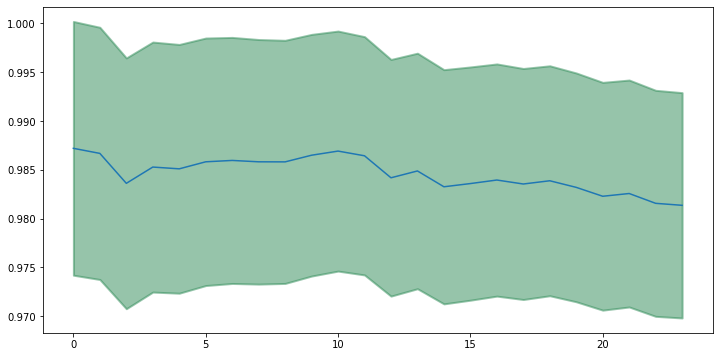

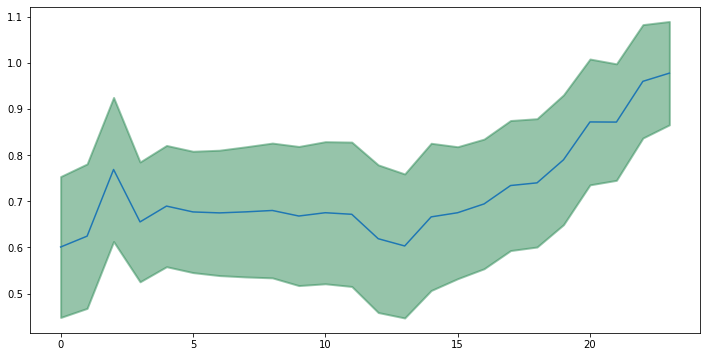

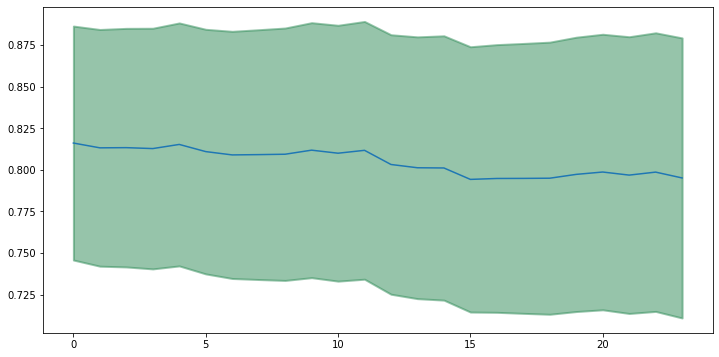

In [27]:
# obtain noise params using MLE
for col in Treasury_zero_low.columns:
    # Training:
    # init a KF instantiate
    KR = KF.Kalman_regression(Treasury_zero_low[col][:training_size-1], Treasury_zero_low[col][1:training_size])
    # calibrate the noise params using MLE
    KR.calibrate_MLE() # var_eps is the measurement noise, var_eta is the process noise
    # run the exact Kalman Algo
    KR.run()
    print("beta_last = ", KR.betas[-1], "P_last = ", KR.Ps[-1])
    
    # Testing:
    # set the last beta and process covariance in train set as the init value of test set
    KR.beta0 = KR.betas[-1]
    KR.P0 = KR.Ps[-1]
    # run on test set
    KR.run(Treasury_zero_low[col][training_size:-1], Treasury_zero_low[col][training_size+1:])
    # plot KF beta and 1 std band
    plt.figure(figsize=(12,6))
    plt.plot(KR.betas, label="Kalman filter betas")
    plt.fill_between(x=range(len(KR.betas)) ,y1=KR.betas + np.sqrt(KR.Ps), y2=KR.betas - np.sqrt(KR.Ps), 
                 alpha=0.5, linewidth=2, color='seagreen', label="Kalman error: $\pm 1 \sigma$ ")

    
    print('\n')

### Randomness test and ARMA Fitting - Treasury Zero - LLE

5     0.000000
11    0.000000
22    0.000000
Name: lb_pvalue, dtype: object
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -137.547
Date:                Thu, 18 Mar 2021   AIC                            281.095
Time:                        12:12:43   BIC                            289.057
Sample:                    11-02-2018   HQIC                           284.321
                         - 10-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.007    138.351      0.000       0.982       1.010
ma.L1         -0.0204      0.073     -0.278      0.781 

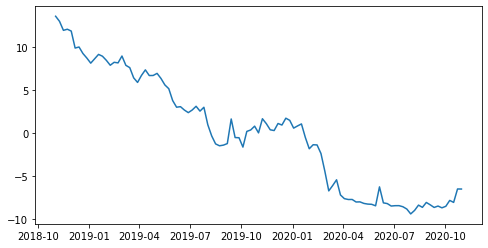

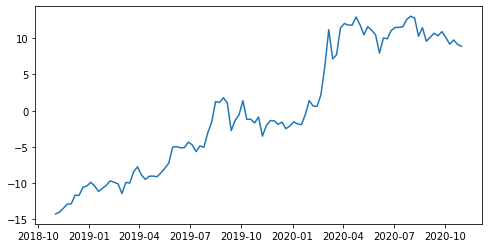

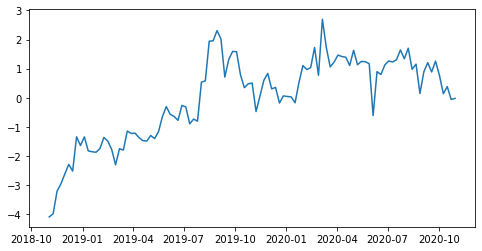

In [41]:
for col in Treasury_zero_low.columns:
    # apply Ljung-Box test before ARMA fitting
    LB_res = smd.acorr_ljungbox(Treasury_zero_low[col], lags=[5, 11, 22], return_df=True)
    print(LB_res['lb_pvalue'].map('{:,.6f}'.format))
    # ARMA fitting
    ARMA11 = smss.SARIMAX( Treasury_zero_low[col], order=(1,0,1), trend='n')
    res_fit = ARMA11.fit(disp=0,method='lbfgs')
    # estimate parameters via maximum likelihood and return a results object
    # this object will have also performed Kalman filtering and smoothing at the estimated parameters).
    plt.figure(figsize=(8,4))
    plt.plot(Treasury_zero_low[col])
    print(res_fit.summary(),'\n')

AR(1) could not well fit all the three LLE low-dim factors in short-term, so we decide use ARMA(1,1) as the final specification.

## Reconstruction to high-D and real-time backtesting

In real-time backtesting, we implemented the PCA-based and LLE-based engine: (1) get low-dim representations (2) for each factor, calibrate the newest Kalman beta, then do one-step ahead prediction (3) inverse transform the predicted factors back to original space (4) evaluate out-of-sample accuracy for tenors of our interest (5) design systematic trading strategies according to the outputed signals.

Trading instrument details: long/short a float-leg receiver swap (remaining T = 5yr (260wk), N = 100M, semiannual compounding (every 26wk), float-rate is the X-month spread, fixed-rate is 1%), holding period = 1 wk)  

Note: 1yr = 12month, 1month = 4.3333wk

### use PCA for different term structures

In [33]:
def Backtesting_PCA(curve_data, rolling_window=60, N=100, swap_rate=1.00, T=260):
    accry = {24:0, 36:0, 60:0, 84:0, 120:0, 240:0, 360:0}
    PnL = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window+1:].index)
    prices = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window:].index)
    T_rmn = T
    
    # calculate init price
    for m in list(accry.keys()):
        # the fixed-leg value is
        fix_val = np.sum(0.5*swap_rate/100*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1:20:2]/100 * curve_data[rolling_window:rolling_window+1].columns[1:20:2] / 12))+ \
                    N*np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][19]/100 * curve_data[rolling_window:rolling_window+1].columns[19] / 12)
        # the float-leg value is
        float_val = (1+0.5*curve_data[rolling_window:rolling_window+1][m].values[0]/100)*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1]/100 * curve_data[rolling_window:rolling_window+1].columns[1] / 12)
        
        prices.loc[curve_data[rolling_window:rolling_window+1].index, m] = float_val-fix_val
 
    
    for i in range( rolling_window, curve_data.shape[0]-1):
        
        # curve_data[i].index is the time to make decision, curve_data[i+1] is the time to materialize PnL
        # the first i = rolling_window
        
        train_data = curve_data[i-rolling_window:i+1]
        test_data = curve_data[i+1:i+2]
    
        scaler = StandardScaler()
        scaler.fit(train_data)
        train_data_scaled = scaler.transform(train_data)
    
        model1 = PCA(n_components=3, copy=True, whiten=False)
        model1.fit(train_data_scaled)
        train_data_low = pd.DataFrame(model1.transform(train_data_scaled))
        train_data_low.index = train_data.index
    
    
        pred_lst = []
        for col in train_data_low.columns:
#             # Training:
#             # init a KF instantiate
#             KR = KF.Kalman_regression(train_data_low[col][:-1], train_data_low[col][1:])
#             # calibrate the noise params using MLE
#             KR.calibrate_MLE()
        
#             # run the exact Kalman Algo
#             KR.run()
    
#             KR.beta0 = KR.betas[-1]
#             KR.P0 = KR.Ps[-1]
    
#             # Predict:
#             pred = KR.beta0 * train_data_low[col][-1] + KR.alpha0
#             pred_lst.append(pred)
    
            ARMA11 = smss.SARIMAX( train_data_low[col], order=(1,0,1) )
            res_fit = ARMA11.fit(disp=0,method='lbfgs')
            pred_lst.append(res_fit.forecast(1).values[0])
            
        pred_ary = np.array(pred_lst).reshape(1,-1)
        pred_data = model1.inverse_transform(pred_ary)
        pred_data = scaler.inverse_transform(pred_data)
        
        
        T_rmn -= 1 # one more less remaining week time to maturity
        # evaluate
        for m in list(accry.keys()):
            if (test_data[m].values-train_data[-1:][m].values) * (pred_data[0,int(m/3)-1]-train_data[-1:][m].values) >= 0:
                accry[m] += 1
            # if underlying float-rate is m-month:
            # match the best approximate discount factor and coupon payment date
            num_rmn_payment = int(np.ceil(T_rmn/(4.3333*6)))
            max_payment_month = int(np.ceil(T_rmn/(4.3333*3)))
            payment_wks = np.arange(T_rmn-26*(num_rmn_payment-1), T_rmn+1, 26)
            
            assert num_rmn_payment==payment_wks.size
            
            # the fixed-leg value is
            fix_val = np.sum(0.5*swap_rate/100*N* \
                             np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1:max_payment_month:2]/100 * payment_wks / 52))+ \
                             N*np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-1]/100 * payment_wks[-1] / 52)
            # the float-leg value is
            float_val = (1+0.5*test_data[m].values[0]/100)*N* \
                        np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1]/100 * payment_wks[0] / 52)
            
            # update new swap price
            prices.loc[test_data.index, m] = float_val-fix_val
            #print(float_val, fix_val)
            
            if pred_data[0,int(m/3)-1]-train_data[-1:][m].values >= 0:
                PnL.loc[test_data.index, m] = prices.diff().loc[test_data.index, m]
            else:
                PnL.loc[test_data.index, m] = - prices.diff().loc[test_data.index, m]
        
        #print(test_data.columns[max_payment_month-2*num_rmn_payment+1:max_payment_month:2])
        #print(payment_wks)
                
    
    accry = {key: round(value / (curve_data.shape[0]-1 - rolling_window),3) for key, value in accry.items()}

    
    return accry, PnL, prices
        



In [34]:
res_SwapSpd_zero, PnL_SwapSpd_zero, prices_SwapSpd_zero = Backtesting_PCA(SwapSpd_zero, rolling_window=60)

In [37]:
res_SwapSpd_zero # one-step forecasting accuracy

{24: 0.568, 36: 0.591, 60: 0.545, 84: 0.636, 120: 0.659, 240: 0.5, 360: 0.545}

Text(0.5, 1.0, 'PCA + ARMA')

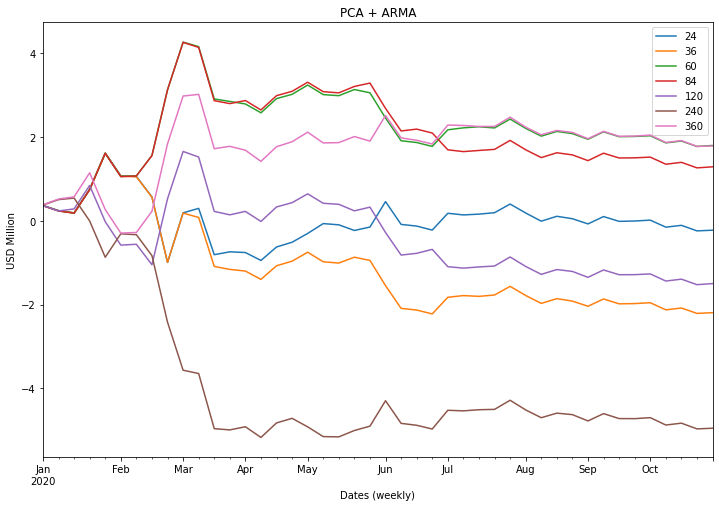

In [42]:
PnL_SwapSpd_zero.cumsum().plot(figsize = (12,8)) # Culmulative PnL with different tenors of spread as underlying
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("PCA + ARMA")

<AxesSubplot:>

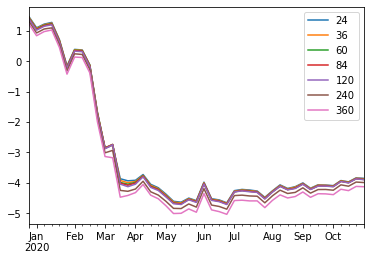

In [23]:
prices_SwapSpd_zero.plot() # price time series with different tenors of spread as underlying

In [47]:
res_BasisSpd_zero, PnL_BasisSpd_zero, prices_BasisSpd_zero = Backtesting_PCA(BasisSpd_zero, rolling_window=60)

In [48]:
res_BasisSpd_zero

{24: 0.545,
 36: 0.523,
 60: 0.455,
 84: 0.545,
 120: 0.614,
 240: 0.614,
 360: 0.682}

Text(0.5, 1.0, 'PCA + ARMA')

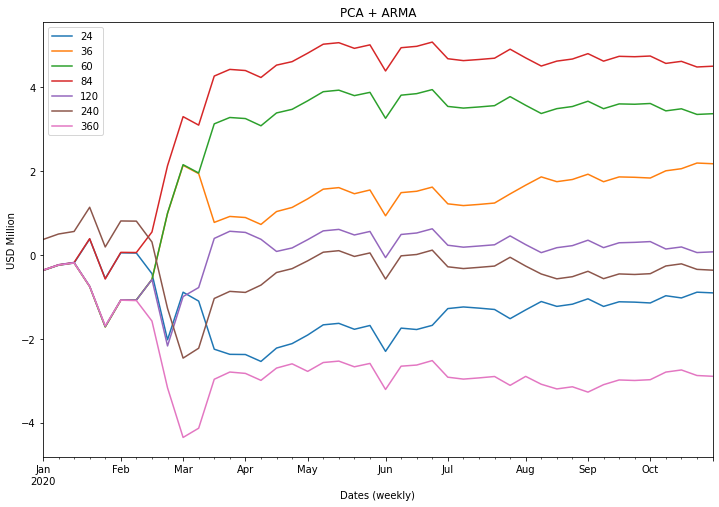

In [49]:
PnL_BasisSpd_zero.cumsum().plot(figsize = (12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("PCA + ARMA")

<AxesSubplot:>

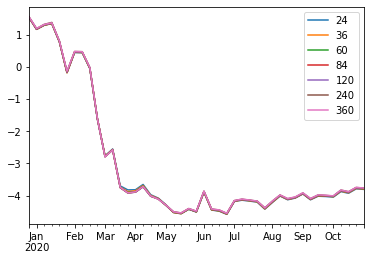

In [27]:
prices_BasisSpd_zero.plot()

The accuracy of directly modeling spread curves are much higher than modeling the three original curves respectively. For the swap spread zero curve, except the 20yr tenor, the out-of-sample accuracy for all other tenors are largen than 0.5. For the basis spread zero curve, except the 2yr tenor, the out-of-sample accuracy for all other tenors are largen than 0.5. 

### use LLE for different term structures

Because the (inverse) manifold learning algo is not a injective function for nonlinear DR (at least for MDS), we may cannot come up with a general approach. Three potential solutions: (1) nonparametric regression, by Z. Zhang and H. Zha, “Principal manifolds and nonlinear dimension reduction via tangent space alignment,”; (2) inverse manifold learning (encoding and decoding) by the scholars in Xihu University (2020). (3) simple LLE reconstruction, by Jin Chen, Shijie Deng, and Xiaoming Huo (2004).

In [50]:
def barycenter_weights(X, Z, reg=1e-3):
    """Compute barycenter weights of X from Z along the first axis
    We estimate the weights to assign to each point in Z[i] to recover
    the point X[i]. The barycenter weights sum to 1.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_dim), original data matrix need to approximate
    Z : array-like, shape (n_samples, n_neighbors, n_dim), neighbor data matrix provided
    reg : float, optional
        amount of regularization to add for the problem to be
        well-posed in the case of n_neighbors > n_dim
    Returns
    -------
    B : array-like, shape (n_samples, n_neighbors), weights matrix
    """
    n_samples, n_neighbors = X.shape[0], Z.shape[1]
    B = np.empty((n_samples, n_neighbors), dtype=X.dtype)
    v = np.ones(n_neighbors, dtype=X.dtype)

    # this might raise a LinalgError if G is singular and has trace zero
    for i, A in enumerate(Z.transpose(0, 2, 1)): # the transposed matrix will be in (n_samples by n_dim by n_neighb)
        # i is the sample index, A is the n_dim by n_neighb matrix
        C = A.T - X[i]  # broadcasting: (n_neighb by n_dim) - (1 by n_dim)
        G = np.dot(C, C.T) # Gram matrix in n_neighb by n_neighb
        trace = np.trace(G)
        if trace > 0:
            R = reg * trace
        else:
            R = reg
        # add regularization term to diagonal of G
        G.flat[::Z.shape[1] + 1] += R
        # solve linear system of equations Gw=v
        w = solve(G, v, sym_pos=True) # n_neighb by 1
        # rescale weights
        B[i, :] = w / np.sum(w)
    return B

In [51]:
from scipy.linalg import eigh, svd, qr, solve
from scipy.sparse import eye, csr_matrix, find
from scipy.sparse.linalg import eigsh
from sklearn.neighbors import NearestNeighbors

def barycenter_kneighbors_graph(X, n_neighbors, reg=1e-3, n_jobs=None):
    """Computes the barycenter weighted graph of k-Neighbors for points in X
    Parameters
    ----------
    X : {array-like, NearestNeighbors}
        Sample data, shape = (n_samples, n_features), in the form of a
        numpy array or a NearestNeighbors object.
    n_neighbors : int
        Number of neighbors for each sample.
    reg : float, optional
        Amount of regularization when solving the least-squares
        problem. Only relevant if mode='barycenter'. If None, use the
        default.
    n_jobs : int or None, optional (default=None)
        The number of parallel jobs to run for neighbors search.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    Returns
    -------
    A : sparse matrix in CSR format, shape = [n_samples, n_samples]
        A[i, j] is assigned the weight of edge that connects i to j.
    See also
    --------
    sklearn.neighbors.kneighbors_graph
    sklearn.neighbors.radius_neighbors_graph
    """
    knn = NearestNeighbors(n_neighbors + 1, n_jobs=n_jobs).fit(X)
    X = knn._fit_X
    n_samples = X.shape[0]
    ind = knn.kneighbors(X, return_distance=False)[:, 1:] #(n_samples by n_neighb)
    
    data = barycenter_weights(X, X[ind], reg=reg)
    # call the func to compute weights (n_samples by n_neighb)
    
    indptr = np.arange(0, n_samples * n_neighbors + 1, n_neighbors)
    return csr_matrix((data.ravel(), ind.ravel(), indptr),
                      shape=(n_samples, n_samples))

In [52]:
def Backtesting_LLE(curve_data, rolling_window=60, N=100, swap_rate=1.00, T=260):
    accry = {24:0, 36:0, 60:0, 84:0, 120:0, 240:0, 360:0}
    PnL = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window+1:].index)
    prices = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window:].index)
    T_rmn = T
    
    # calculate init price
    for m in list(accry.keys()):
        # the fixed-leg value is
        fix_val = np.sum(0.5*swap_rate/100*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1:20:2]/100 * curve_data[rolling_window:rolling_window+1].columns[1:20:2] / 12))+ \
                    N*np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][19]/100 * curve_data[rolling_window:rolling_window+1].columns[19] / 12)
        # the float-leg value is
        float_val = (1+0.5*curve_data[rolling_window:rolling_window+1][m].values[0]/100)*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1]/100 * curve_data[rolling_window:rolling_window+1].columns[1] / 12)
        
        prices.loc[curve_data[rolling_window:rolling_window+1].index, m] = float_val-fix_val
    
    for i in range( rolling_window, curve_data.shape[0]-1):
    
        train_data = curve_data[i-rolling_window:i+1]
        test_data = curve_data[i+1:i+2]
    
        scaler = StandardScaler()
        scaler.fit(train_data)
        train_data_scaled = scaler.transform(train_data)
    
        model2 = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
        model2.fit(train_data_scaled)
        train_data_low = pd.DataFrame(model2.transform(train_data_scaled))
        train_data_low.index = train_data.index
        
    
        pred_lst = []
        for col in train_data_low.columns:
#             # Training:
#             # init a KF instantiate
#             KR = KF.Kalman_regression(train_data_low[col][:-1], train_data_low[col][1:])
#             # calibrate the noise params using MLE
#             KR.calibrate_MLE()
        
#             # run the exact Kalman Algo
#             KR.run()
    
#             KR.beta0 = KR.betas[-1]
#             KR.P0 = KR.Ps[-1]
    
#             # Predict:
#             pred = KR.beta0 * train_data_low[col][-1] + KR.alpha0
#             pred_lst.append(pred)
            
            ARMA11 = smss.SARIMAX( train_data_low[col], order=(1,0,1) )
            res_fit = ARMA11.fit(disp=0,method='lbfgs')
            pred_lst.append(res_fit.forecast(1).values[0])
    
    
        pred_ary = np.array(pred_lst).reshape(1,-1)
        
        # inverse transform
        X = np.vstack((train_data_low.to_numpy(),pred_ary))
        
        W = barycenter_kneighbors_graph(X, n_neighbors=10)
        pred_data = W.toarray()[-1:,:-1].dot(train_data_scaled) # (1 by n_samples-1) times (n_train_samples by high_dim)
        #print(pred_data.shape, type(pred_data))
        
        pred_data = scaler.inverse_transform(pred_data)

        T_rmn -= 1 # one more less remaining week time to maturity
        # evaluate
        for m in list(accry.keys()):
            if (test_data[m].values-train_data[-1:][m].values) * (pred_data[0,int(m/3)-1]-train_data[-1:][m].values) >= 0:
                accry[m] += 1
            # if underlying float-rate is m-month:
            # match the best approximate discount factor and coupon payment date
            num_rmn_payment = int(np.ceil(T_rmn/(4.3333*6)))
            max_payment_month = int(np.ceil(T_rmn/(4.3333*3)))
            payment_wks = np.arange(T_rmn-26*(num_rmn_payment-1), T_rmn+1, 26)
            
            assert num_rmn_payment==payment_wks.size
            
            # the fixed-leg value is
            fix_val = np.sum(0.5*swap_rate/100*N* \
                             np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1:max_payment_month:2]/100 * payment_wks / 52))+ \
                             N*np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-1]/100 * payment_wks[-1] / 52)
            # the float-leg value is
            float_val = (1+0.5*test_data[m].values[0]/100)*N* \
                        np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1]/100 * payment_wks[0] / 52)
            
            # update new swap price
            prices.loc[test_data.index, m] = float_val-fix_val
            #print(float_val, fix_val)
            
            if pred_data[0,int(m/3)-1]-train_data[-1:][m].values >= 0:
                PnL.loc[test_data.index, m] = prices.diff().loc[test_data.index, m]
            else:
                PnL.loc[test_data.index, m] = - prices.diff().loc[test_data.index, m]
        
        #print(test_data.columns[max_payment_month-2*num_rmn_payment+1:max_payment_month:2])
        #print(payment_wks)
    
    accry = {key: round(value / (curve_data.shape[0]-1 - rolling_window),3) for key, value in accry.items()}

    
    return accry, PnL, prices

In [53]:
res_SwapSpd_zero, PnL_SwapSpd_zero, prices_SwapSpd_zero = Backtesting_LLE(SwapSpd_zero, rolling_window=60)
res_SwapSpd_zero

{24: 0.636,
 36: 0.659,
 60: 0.614,
 84: 0.614,
 120: 0.682,
 240: 0.568,
 360: 0.727}

Text(0.5, 1.0, 'LLE + ARMA')

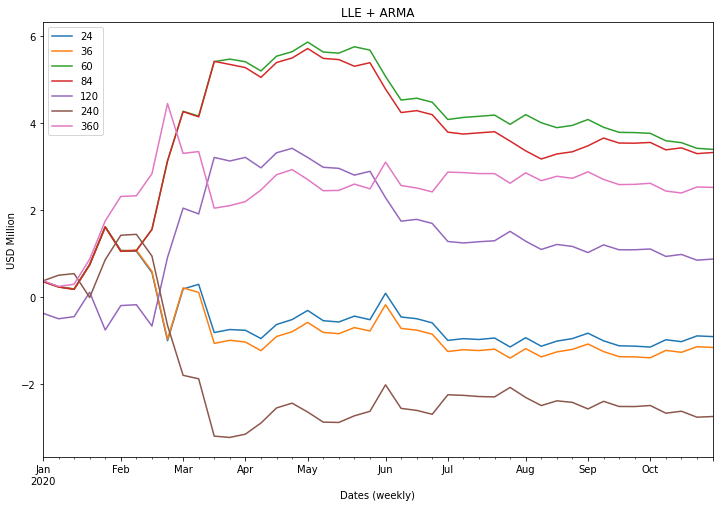

In [54]:
PnL_SwapSpd_zero.cumsum().plot(figsize=(12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("LLE + ARMA")

<AxesSubplot:>

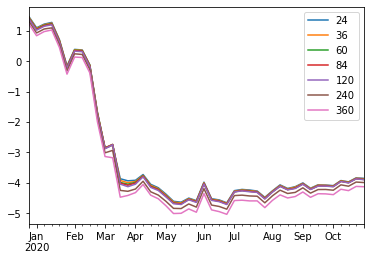

In [36]:
prices_SwapSpd_zero.plot()

In [55]:
res_BasisSpd_zero, PnL_BasisSpd_zero, prices_BasisSpd_zero = Backtesting_LLE(BasisSpd_zero, rolling_window=60)
res_BasisSpd_zero

{24: 0.5, 36: 0.5, 60: 0.523, 84: 0.477, 120: 0.545, 240: 0.659, 360: 0.545}

Text(0.5, 1.0, 'LLE + ARMA')

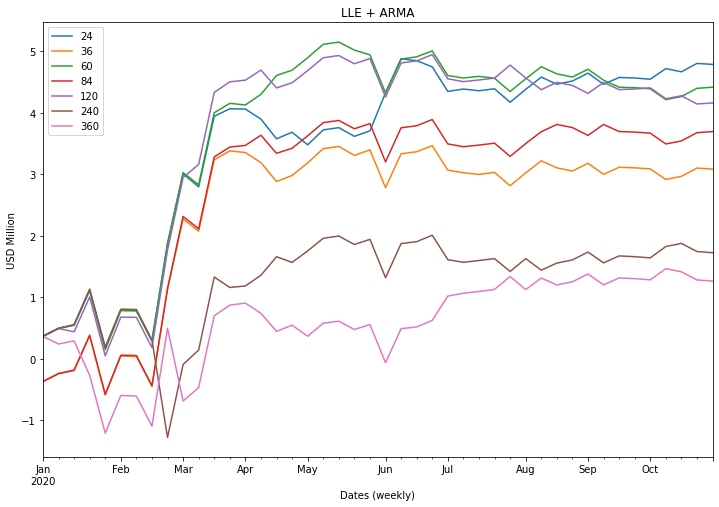

In [57]:
PnL_BasisSpd_zero.cumsum().plot(figsize=(12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("LLE + ARMA")

<AxesSubplot:>

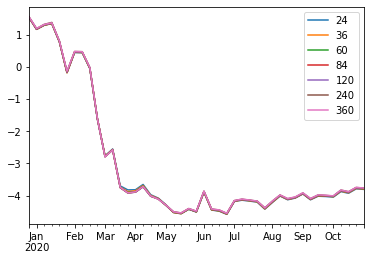

In [39]:
prices_BasisSpd_zero.plot()

### use MDS/t-SNE for different term structures

### Relative-value Trading Strategies (level, fly, butterfly)

In [58]:
def Backtesting_PCA_RV(curve_data, rolling_window=60, N=100, swap_rate=1.00, T=260, fly_tenor = [24,120], bf_tenor = [24,60,120]):
    
    accry = {'level': 0, 'fly': 0, 'bf': 0}
    PnL = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window+1:].index)
    all_tenor = sorted(list(set(fly_tenor+bf_tenor)))
    prices = pd.DataFrame(columns=all_tenor, index = curve_data[rolling_window:].index)
    T_rmn = T
    
    # calculate init price
    for m in all_tenor:
        
        # the fixed-leg value is
        fix_val = np.sum(0.5*swap_rate/100*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1:20:2]/100 * curve_data[rolling_window:rolling_window+1].columns[1:20:2] / 12))+ \
                    N*np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][19]/100 * curve_data[rolling_window:rolling_window+1].columns[19] / 12)
        # the float-leg value is
        float_val = (1+0.5*curve_data[rolling_window:rolling_window+1][m].values[0]/100)*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1]/100 * curve_data[rolling_window:rolling_window+1].columns[1] / 12)
        
        prices.loc[curve_data[rolling_window:rolling_window+1].index, m] = float_val-fix_val
 
    
    for i in range( rolling_window, curve_data.shape[0]-1):
        
        # curve_data[i].index is the time to make decision, curve_data[i+1] is the time to materialize PnL
        # the first i = rolling_window
        
        train_data = curve_data[i-rolling_window:i+1]
        test_data = curve_data[i+1:i+2]
    
        scaler = StandardScaler()
        scaler.fit(train_data)
        train_data_scaled = scaler.transform(train_data)
    
        model1 = PCA(n_components=3, copy=True, whiten=False)
        model1.fit(train_data_scaled)
        train_data_low = pd.DataFrame(model1.transform(train_data_scaled))
        train_data_low.index = train_data.index
    
    
        pred_lst = []
        for col in train_data_low.columns:
            ARMA11 = smss.SARIMAX( train_data_low[col], order=(1,0,1) )
            res_fit = ARMA11.fit(disp=0,method='lbfgs')
            pred_lst.append(res_fit.forecast(1).values[0])
            
        pred_ary = np.array(pred_lst).reshape(1,-1)
        pred_data = model1.inverse_transform(pred_ary)
        pred_data = scaler.inverse_transform(pred_data)
        
        
        T_rmn -= 1 # one more less remaining week time to maturity
        # evaluate
        for m in all_tenor:
            
            # if underlying float-rate is m-month:
            # match the best approximate discount factor and coupon payment date
            num_rmn_payment = int(np.ceil(T_rmn/(4.3333*6)))
            max_payment_month = int(np.ceil(T_rmn/(4.3333*3)))
            payment_wks = np.arange(T_rmn-26*(num_rmn_payment-1), T_rmn+1, 26)
            
            assert num_rmn_payment==payment_wks.size
            
            # the fixed-leg value is
            fix_val = np.sum(0.5*swap_rate/100*N* \
                             np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1:max_payment_month:2]/100 * payment_wks / 52))+ \
                             N*np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-1]/100 * payment_wks[-1] / 52)
            # the float-leg value is
            float_val = (1+0.5*test_data[m].values[0]/100)*N* \
                        np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1]/100 * payment_wks[0] / 52)
            
            # update new swap price
            prices.loc[test_data.index, m] = float_val-fix_val

    
        # accuracy eval
        # level
        if (test_data[all_tenor].mean(axis=1).values - train_data[-1:][all_tenor].mean(axis=1).values) * \
            (np.mean(pred_data[0,[int(ele/3)-1 for ele in all_tenor]]) - train_data[-1:][all_tenor].mean(axis=1).values) >= 0:
            accry['level'] += 1
        # fly
        if ((test_data[fly_tenor[1]].values-test_data[fly_tenor[0]].values) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) * \
            ((pred_data[0,int(fly_tenor[1]/3)-1]-pred_data[0,int(fly_tenor[0]/3)-1]) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) >= 0:
            accry['fly'] += 1
        # butterfly
        if ((test_data[bf_tenor[2]].values+test_data[bf_tenor[0]].values-2*test_data[bf_tenor[1]].values) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) * \
            ((pred_data[0,int(bf_tenor[2]/3)-1]+pred_data[0,int(bf_tenor[0]/3)-1]-2*pred_data[0,int(bf_tenor[1]/3)-1]) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) >= 0:
            accry['bf'] += 1
    
        # PnL calculation
        prices_changes = prices.diff()
        # level
        if (np.mean(pred_data[0,[int(ele/3)-1 for ele in all_tenor]]) - train_data[-1:][all_tenor].mean(axis=1).values) >= 0:
            PnL.loc[test_data.index, 'level'] = prices_changes.loc[test_data.index].mean(axis=1)
        else:
            PnL.loc[test_data.index, 'level'] = - prices_changes.loc[test_data.index].mean(axis=1)
        # fly
        if ((pred_data[0,int(fly_tenor[1]/3)-1]-pred_data[0,int(fly_tenor[0]/3)-1]) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) >= 0:
            PnL.loc[test_data.index, 'fly'] = prices_changes.loc[test_data.index, fly_tenor[1]] - prices_changes.loc[test_data.index, fly_tenor[0]]
        else:
            PnL.loc[test_data.index, 'fly'] = -prices_changes.loc[test_data.index, fly_tenor[1]]+prices_changes.loc[test_data.index, fly_tenor[0]]
        # butterfly
        if ((pred_data[0,int(bf_tenor[2]/3)-1]+pred_data[0,int(bf_tenor[0]/3)-1]-2*pred_data[0,int(bf_tenor[1]/3)-1]) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) >= 0:
            PnL.loc[test_data.index, 'bf'] = 0.5*(prices_changes.loc[test_data.index, bf_tenor[0]]+prices_changes.loc[test_data.index, bf_tenor[2]]) - prices_changes.loc[test_data.index, bf_tenor[1]]
        else:
            PnL.loc[test_data.index, 'bf'] = -0.5*(prices_changes.loc[test_data.index, bf_tenor[0]]+prices_changes.loc[test_data.index, bf_tenor[2]])+prices_changes.loc[test_data.index, bf_tenor[1]]
        
    
    accry = {key: round(value / (curve_data.shape[0]-1 - rolling_window),3) for key, value in accry.items()}

    
    return accry, PnL
        


    

In [59]:
res_SwapSpd_RV, PnL_SwapSpd_RV = Backtesting_PCA_RV(SwapSpd_zero, rolling_window=60)
res_SwapSpd_RV

{'level': 0.614, 'fly': 0.523, 'bf': 0.477}

Text(0.5, 1.0, 'PCA + ARMA')

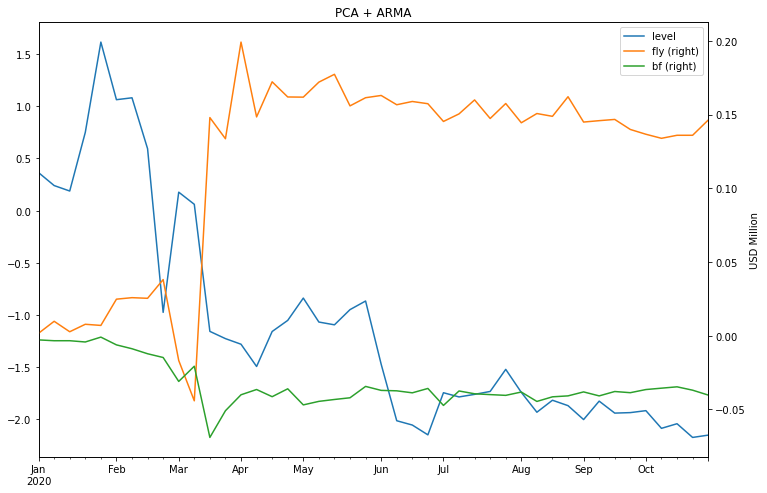

In [63]:
PnL_SwapSpd_RV.cumsum().plot(secondary_y = ['fly','bf'] ,figsize = (12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("PCA + ARMA")

In [64]:
res_BasisSpd_RV, PnL_BasisSpd_RV = Backtesting_PCA_RV(BasisSpd_zero, rolling_window=60)
res_BasisSpd_RV

{'level': 0.568, 'fly': 0.5, 'bf': 0.614}

Text(0.5, 1.0, 'PCA + ARMA')

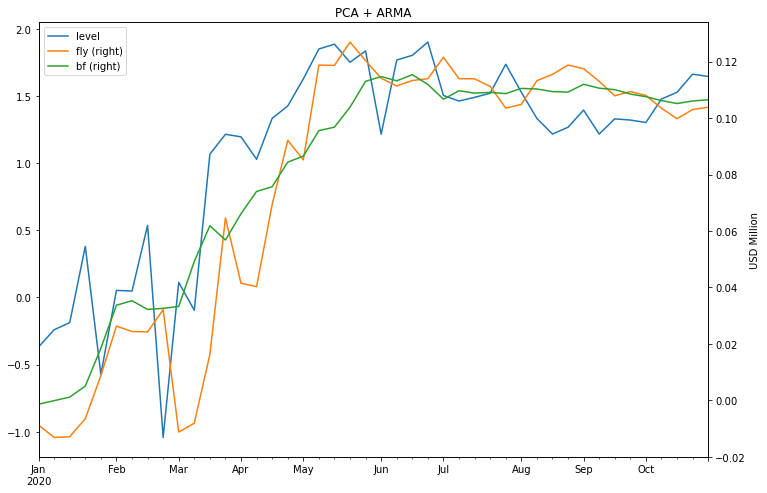

In [65]:
PnL_BasisSpd_RV.cumsum().plot(secondary_y = ['fly','bf'],figsize = (12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("PCA + ARMA")

In [66]:
def Backtesting_LLE_RV(curve_data, rolling_window=60, N=100, swap_rate=1.00, T=260, fly_tenor = [24,120], bf_tenor = [24,60,120]):
    
    accry = {'level': 0, 'fly': 0, 'bf': 0}
    PnL = pd.DataFrame(columns=list(accry.keys()), index = curve_data[rolling_window+1:].index)
    all_tenor = sorted(list(set(fly_tenor+bf_tenor)))
    prices = pd.DataFrame(columns=all_tenor, index = curve_data[rolling_window:].index)
    T_rmn = T
    
    # calculate init price
    for m in all_tenor:
        
        # the fixed-leg value is
        fix_val = np.sum(0.5*swap_rate/100*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1:20:2]/100 * curve_data[rolling_window:rolling_window+1].columns[1:20:2] / 12))+ \
                    N*np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][19]/100 * curve_data[rolling_window:rolling_window+1].columns[19] / 12)
        # the float-leg value is
        float_val = (1+0.5*curve_data[rolling_window:rolling_window+1][m].values[0]/100)*N* \
                    np.exp(- OIS_zero.loc[curve_data[rolling_window:rolling_window+1].index].values[0][1]/100 * curve_data[rolling_window:rolling_window+1].columns[1] / 12)
        
        prices.loc[curve_data[rolling_window:rolling_window+1].index, m] = float_val-fix_val
 
    
    for i in range( rolling_window, curve_data.shape[0]-1):
        
        # curve_data[i].index is the time to make decision, curve_data[i+1] is the time to materialize PnL
        # the first i = rolling_window
        train_data = curve_data[i-rolling_window:i+1]
        test_data = curve_data[i+1:i+2]
    
        scaler = StandardScaler()
        scaler.fit(train_data)
        train_data_scaled = scaler.transform(train_data)
    
        model2 = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
        model2.fit(train_data_scaled)
        train_data_low = pd.DataFrame(model2.transform(train_data_scaled))
        train_data_low.index = train_data.index
        
        
        pred_lst = []
        for col in train_data_low.columns:
            ARMA11 = smss.SARIMAX( train_data_low[col], order=(1,0,1) )
            res_fit = ARMA11.fit(disp=0,method='lbfgs')
            pred_lst.append(res_fit.forecast(1).values[0])
            
        
        
        pred_ary = np.array(pred_lst).reshape(1,-1)
        
        # inverse transform
        X = np.vstack((train_data_low.to_numpy(),pred_ary))
        
        W = barycenter_kneighbors_graph(X, n_neighbors=10)
        pred_data = W.toarray()[-1:,:-1].dot(train_data_scaled) # (1 by n_samples-1) times (n_train_samples by high_dim)
        #print(pred_data.shape, type(pred_data))
        
        pred_data = scaler.inverse_transform(pred_data)
        
        
        T_rmn -= 1 # one more less remaining week time to maturity
        # evaluate
        for m in all_tenor:
            
            # if underlying float-rate is m-month:
            # match the best approximate discount factor and coupon payment date
            num_rmn_payment = int(np.ceil(T_rmn/(4.3333*6)))
            max_payment_month = int(np.ceil(T_rmn/(4.3333*3)))
            payment_wks = np.arange(T_rmn-26*(num_rmn_payment-1), T_rmn+1, 26)
            
            assert num_rmn_payment==payment_wks.size
            
            # the fixed-leg value is
            fix_val = np.sum(0.5*swap_rate/100*N* \
                             np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1:max_payment_month:2]/100 * payment_wks / 52))+ \
                             N*np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-1]/100 * payment_wks[-1] / 52)
            # the float-leg value is
            float_val = (1+0.5*test_data[m].values[0]/100)*N* \
                        np.exp(- OIS_zero.loc[test_data.index].values[0][max_payment_month-2*num_rmn_payment+1]/100 * payment_wks[0] / 52)
            
            # update new swap price
            prices.loc[test_data.index, m] = float_val-fix_val

    
        # accuracy eval
        # level
        if (test_data[all_tenor].mean(axis=1).values - train_data[-1:][all_tenor].mean(axis=1).values) * \
            (np.mean(pred_data[0,[int(ele/3)-1 for ele in all_tenor]]) - train_data[-1:][all_tenor].mean(axis=1).values) >= 0:
            accry['level'] += 1
        # fly
        if ((test_data[fly_tenor[1]].values-test_data[fly_tenor[0]].values) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) * \
            ((pred_data[0,int(fly_tenor[1]/3)-1]-pred_data[0,int(fly_tenor[0]/3)-1]) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) >= 0:
            accry['fly'] += 1
        # butterfly
        if ((test_data[bf_tenor[2]].values+test_data[bf_tenor[0]].values-2*test_data[bf_tenor[1]].values) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) * \
            ((pred_data[0,int(bf_tenor[2]/3)-1]+pred_data[0,int(bf_tenor[0]/3)-1]-2*pred_data[0,int(bf_tenor[1]/3)-1]) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) >= 0:
            accry['bf'] += 1
    
        # PnL calculation
        prices_changes = prices.diff()
        # level
        if (np.mean(pred_data[0,[int(ele/3)-1 for ele in all_tenor]]) - train_data[-1:][all_tenor].mean(axis=1).values) >= 0:
            PnL.loc[test_data.index, 'level'] = prices_changes.loc[test_data.index].mean(axis=1)
        else:
            PnL.loc[test_data.index, 'level'] = - prices_changes.loc[test_data.index].mean(axis=1)
        # fly
        if ((pred_data[0,int(fly_tenor[1]/3)-1]-pred_data[0,int(fly_tenor[0]/3)-1]) - (train_data[-1:][fly_tenor[1]].values-train_data[-1:][fly_tenor[0]].values)) >= 0:
            PnL.loc[test_data.index, 'fly'] = prices_changes.loc[test_data.index, fly_tenor[1]] - prices_changes.loc[test_data.index, fly_tenor[0]]
        else:
            PnL.loc[test_data.index, 'fly'] = -prices_changes.loc[test_data.index, fly_tenor[1]]+prices_changes.loc[test_data.index, fly_tenor[0]]
        # butterfly
        if ((pred_data[0,int(bf_tenor[2]/3)-1]+pred_data[0,int(bf_tenor[0]/3)-1]-2*pred_data[0,int(bf_tenor[1]/3)-1]) - (train_data[-1:][bf_tenor[2]].values+train_data[-1:][bf_tenor[0]].values-2*train_data[-1:][bf_tenor[1]].values)) >= 0:
            PnL.loc[test_data.index, 'bf'] = 0.5*(prices_changes.loc[test_data.index, bf_tenor[0]]+prices_changes.loc[test_data.index, bf_tenor[2]]) - prices_changes.loc[test_data.index, bf_tenor[1]]
        else:
            PnL.loc[test_data.index, 'bf'] = -0.5*(prices_changes.loc[test_data.index, bf_tenor[0]]+prices_changes.loc[test_data.index, bf_tenor[2]])+prices_changes.loc[test_data.index, bf_tenor[1]]
        
    
    accry = {key: round(value / (curve_data.shape[0]-1 - rolling_window),3) for key, value in accry.items()}

    
    return accry, PnL
        

In [67]:
res_SwapSpd_RV, PnL_SwapSpd_RV = Backtesting_LLE_RV(SwapSpd_zero, rolling_window=60)
res_SwapSpd_RV

{'level': 0.682, 'fly': 0.523, 'bf': 0.659}

Text(0.5, 1.0, 'LLE + ARMA')

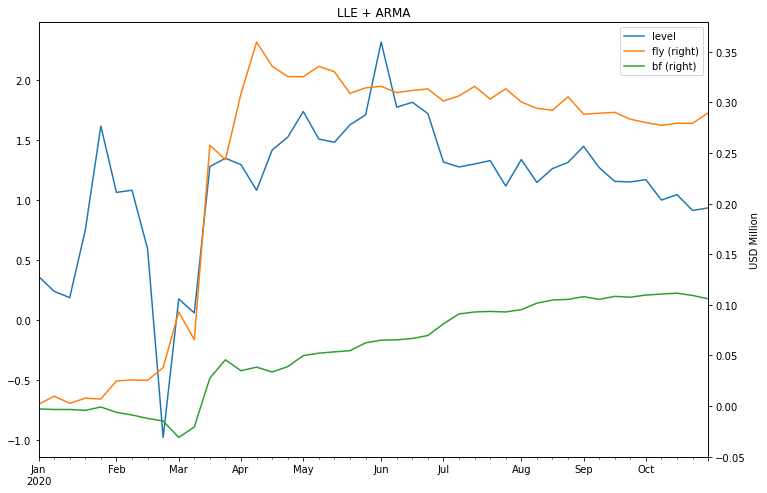

In [68]:
PnL_SwapSpd_RV.cumsum().plot(secondary_y = ['fly','bf'], figsize=(12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("LLE + ARMA")

In [69]:
res_BasisSpd_RV, PnL_BasisSpd_RV = Backtesting_LLE_RV(BasisSpd_zero, rolling_window=60)
res_BasisSpd_RV

{'level': 0.5, 'fly': 0.455, 'bf': 0.545}

Text(0.5, 1.0, 'LLE + ARMA')

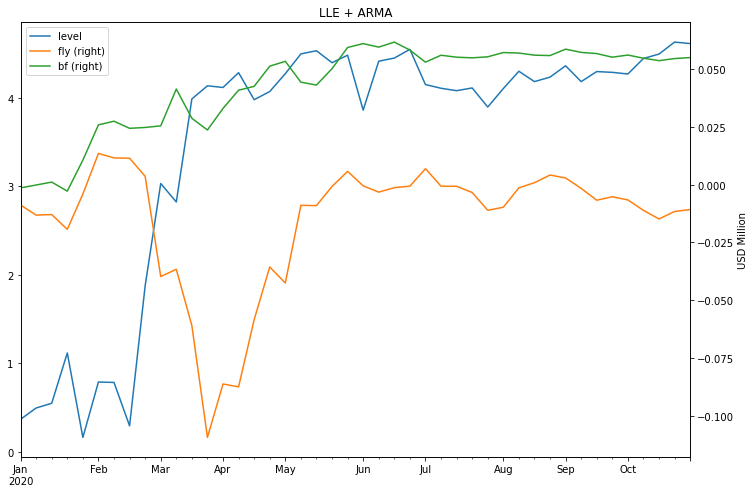

In [71]:
PnL_BasisSpd_RV.cumsum().plot(secondary_y = ['fly','bf'], figsize=(12,8))
plt.xlabel("Dates (weekly)")
plt.ylabel("USD Million")
plt.title("LLE + ARMA")